## Data Preparation and Processing

In [3]:
import numpy as np
from random import randint 
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [4]:
train_labels = []
train_samples = []

Example Data 
- an experimental drug was tested on 2100 people, ranging from 13-100 
- Ages 65 +: 95% of participants had side effects 
- Ages <65 : 95% had no side effects

In [5]:
for i in range(50):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger = randint(13, 64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older = randint(65, 100)
  train_samples.append(random_older)
  train_labels.append(1)


In [7]:
train_samples[:10]

[52, 77, 43, 72, 23, 82, 64, 87, 27, 83]

In [8]:
train_labels[:10]

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [9]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [31]:
# normalising data 
scaler = MinMaxScaler(feature_range=(0,1))
# our data is 1D so we need to transform it
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [32]:
# EG
train_samples.reshape(-1,1)

array([[21],
       [42],
       [79],
       ...,
       [32],
       [57],
       [99]])

In [33]:
scaled_train_samples[:10]

array([[0.09195402],
       [0.33333333],
       [0.75862069],
       [0.59770115],
       [0.95402299],
       [0.08045977],
       [0.85057471],
       [0.95402299],
       [0.5862069 ],
       [0.09195402]])

## Sequential Model tf.keras

In [34]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras.metrics import categorical_crossentropy

In [35]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs available : ", len(physical_devices))

Num GPUs available :  0


In [36]:
#tf.config.experimental.set_memory_growth(physical_devices[0], true)

In [37]:
# Model we are building - Linear stack of layers, which is Sequential 
# Pass in a list of layers
# we do not explicitly define the input data
model = Sequential([
                    Dense(units=16, input_shape=(1,), activation='relu'), 
                    Dense(units=32, activation='relu'),
                    Dense(units=2, activation='softmax')
])

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                32        
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [39]:
#Preparing model for training
model.compile(optimizer=Adam(learning_rate=0.0001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [42]:
# Training our model
# x : our data 
# y : labels 
# validation split: train / test split
# batch_size : how mnay samples per batch to be passed and processed at a given time
# epochs : model trains on data 30 times
# shuffle : data is shuffled by default when passed to the network 
# verbose : option to see output from running

# validation_split will get the last X% of the dataset before shuffling, we shuffled beforehand to remove this problem 
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.2452 - accuracy: 0.9450 - val_loss: 0.2422 - val_accuracy: 0.9524 - 368ms/epoch - 2ms/step
Epoch 2/30
189/189 - 0s - loss: 0.2449 - accuracy: 0.9450 - val_loss: 0.2418 - val_accuracy: 0.9524 - 354ms/epoch - 2ms/step
Epoch 3/30
189/189 - 0s - loss: 0.2447 - accuracy: 0.9450 - val_loss: 0.2423 - val_accuracy: 0.9524 - 346ms/epoch - 2ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2445 - accuracy: 0.9460 - val_loss: 0.2413 - val_accuracy: 0.9524 - 366ms/epoch - 2ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2441 - accuracy: 0.9450 - val_loss: 0.2410 - val_accuracy: 0.9524 - 335ms/epoch - 2ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2437 - accuracy: 0.9450 - val_loss: 0.2406 - val_accuracy: 0.9524 - 353ms/epoch - 2ms/step
Epoch 7/30
189/189 - 0s - loss: 0.2436 - accuracy: 0.9460 - val_loss: 0.2404 - val_accuracy: 0.9524 - 345ms/epoch - 2ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2432 - accuracy: 0.9450 - val_loss: 0.2404 - val_accuracy: 0.9524 - 438ms/epoch - 2ms/step


## Test Data

In [43]:
# We want to use the model on new data and get results on its inference 
# Inference: model takes its knowledge and infers on new data 

test_samples = []
test_labels = []

for i in range(10):
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  random_younger = randint(13, 64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older = randint(65, 100)
  test_samples.append(random_older)
  test_labels.append(1)

In [44]:
test_samples = np.array(test_samples)
test_labels = np.array(test_labels)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [46]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

## Predict

In [49]:
# Getting predictions from our model using the test data
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

In [50]:
predictions

array([[0.05723764, 0.9427624 ],
       [0.49932995, 0.50067   ],
       [0.05723764, 0.9427624 ],
       [0.02524463, 0.97475535],
       [0.9754186 , 0.02458132],
       [0.97515374, 0.02484627],
       [0.97515374, 0.02484627],
       [0.975686  , 0.02431397],
       [0.15524507, 0.84475493],
       [0.97621197, 0.023788  ],
       [0.17200765, 0.8279923 ],
       [0.9006137 , 0.09938632],
       [0.09191944, 0.9080805 ],
       [0.05723764, 0.9427624 ],
       [0.05280996, 0.9471901 ],
       [0.95365363, 0.04634635],
       [0.04490791, 0.9550921 ],
       [0.01529592, 0.984704  ],
       [0.975686  , 0.02431397],
       [0.97332025, 0.02667977],
       [0.9586655 , 0.0413345 ],
       [0.05280996, 0.9471901 ],
       [0.9737534 , 0.02624659],
       [0.68607414, 0.31392586],
       [0.03814065, 0.96185935],
       [0.37152362, 0.6284764 ],
       [0.12459345, 0.87540656],
       [0.03235861, 0.9676414 ],
       [0.01808609, 0.98191386],
       [0.73949254, 0.26050752],
       [0.

In [51]:
rounded_predictions = np.argmax(predictions, axis=1)

In [52]:
rounded_predictions

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

## Confusion Matrix
- visually observe the performance on test data

In [59]:
%matplotlib inline 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [60]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [61]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize: 
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print('Normalised confusion matrix')
    else: 
      print('Confusion Matrix, without Normalisation')

    print(cm)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j ,i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')

Confusion Matrix, without Normalisation
[[193  17]
 [ 10 200]]


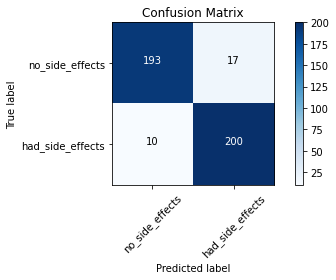

In [62]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title = 'Confusion Matrix')

## Saving a Model - to File

In [63]:
import os.path 

In [64]:
if os.path.isfile('models/medical_trial_model.h5') is False:
  model.save('models/medical_trial_model.h5')

This save functions saves: 
- The architecture of the model, allowing to re-create the model 
- The weights of the model
- The training configuration (loss, optimizer)
- The state of the optimizerm, allowing to resume training exactly where you left off


In [65]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [66]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                32        
                                                                 
 dense_10 (Dense)            (None, 32)                544       
                                                                 
 dense_11 (Dense)            (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [67]:
new_model.get_weights()

[array([[-0.24487692,  0.36332896, -0.28076738, -0.2676002 ,  0.325522  ,
         -0.34496284, -0.07076126,  0.75967413, -0.38358724,  0.33244798,
          0.3829119 ,  0.29641068, -0.29076147, -0.27953494,  0.62667775,
          0.7305123 ]], dtype=float32),
 array([ 0.        , -0.16746372,  0.        ,  0.        ,  0.10039227,
         0.        ,  0.        ,  0.02779146,  0.        , -0.16651171,
        -0.17840725, -0.15021846,  0.        ,  0.        , -0.21687637,
        -0.23306507], dtype=float32),
 array([[-1.29390061e-02, -6.60669804e-03, -2.65384287e-01,
         -1.65601283e-01,  1.34719282e-01,  2.13515431e-01,
         -7.58885145e-02,  2.31455475e-01,  2.77431816e-01,
          2.17070431e-01,  2.76889533e-01, -4.18567657e-03,
         -2.35644460e-01, -5.81462979e-02, -1.91253126e-02,
          1.33863270e-01,  1.75273627e-01,  1.53464377e-02,
         -1.63980827e-01,  7.82489777e-04,  1.27944171e-01,
         -2.81157136e-01,  2.45260030e-01, -3.22646171e-01,
 

In [68]:
new_model.optimizer